In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
aapl = pd.read_csv("AAPL_CLOSE", index_col="Date", parse_dates=True)
amzn = pd.read_csv("AMZN_CLOSE", index_col="Date", parse_dates=True)
cisco = pd.read_csv("CISCO_CLOSE", index_col="Date", parse_dates=True)
ibm = pd.read_csv("IBM_CLOSE", index_col="Date", parse_dates=True)

In [15]:
stock_list = [aapl,amzn,cisco,ibm]
stock_d = {"AAPL":aapl, "AMZN":amzn, "CISCO":cisco, "IBM":ibm}
stock_d.keys()

dict_keys(['AAPL', 'AMZN', 'CISCO', 'IBM'])

## Cumulative Daily Returns

This is found by dividing each day's price by the first day. This gives the cumulative returns for each day. 

In [16]:
for stock in stock_list:
    stock["Normed Ret"] = stock["Adj. Close"] / stock.iloc[0]["Adj. Close"]

In [17]:
aapl.head()

,Adj. Close,Normed Ret
Date,,
2012-01-03,53.063218,1.000000
2012-01-04,53.348386,1.005374
2012-01-05,53.940658,1.016536
2012-01-06,54.504543,1.027162
2012-01-09,54.418089,1.025533


In [18]:
aapl.tail()

,Adj. Close,Normed Ret
Date,,
2016-12-23,115.547742,2.177549
2016-12-27,116.281568,2.191378
2016-12-28,115.785740,2.182034
2016-12-29,115.755990,2.181473
2016-12-30,114.853583,2.164467


## Creating allocation

In [19]:
alloc = [0.3,0.1,0.2,0.4]

In [20]:
for stock, al in zip(stock_list,alloc):
    stock["Allocation"] = stock["Normed Ret"] * al
    stock["Position Values"] = stock["Allocation"] * 1000000

In [21]:
aapl.head()

,Adj. Close,Normed Ret,Allocation,Position Values
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300000.000000
2012-01-04,53.348386,1.005374,0.301612,301612.236461
2012-01-05,53.940658,1.016536,0.304961,304960.727573
2012-01-06,54.504543,1.027162,0.308149,308148.724558
2012-01-09,54.418089,1.025533,0.307660,307659.946988


In [22]:
all_pos_val = pd.concat([aapl["Position Values"],amzn["Position Values"],cisco["Position Values"],ibm["Position Values"]],axis=1)
all_pos_val.columns = ["AAPL_POS","AMZN_POS","CISCO_POS","IBM_POS"]
all_pos_val.head()

,AAPL_POS,AMZN_POS,CISCO_POS,IBM_POS
Date,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000
2012-01-04,301612.236461,99150.980283,203864.734300,398368.223296
2012-01-05,304960.727573,99206.836843,203113.258186,396478.797638
2012-01-06,308148.724558,101999.664861,202361.782072,391926.999463
2012-01-09,307659.946988,99737.474166,203650.026838,389887.278583


In [23]:
all_pos_val["Total Pos"] = all_pos_val.sum(axis=1)
all_pos_val.head()

,AAPL_POS,AMZN_POS,CISCO_POS,IBM_POS,Total Pos
Date,,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,99150.980283,203864.734300,398368.223296,1.002996e+06
2012-01-05,304960.727573,99206.836843,203113.258186,396478.797638,1.003760e+06
2012-01-06,308148.724558,101999.664861,202361.782072,391926.999463,1.004437e+06
2012-01-09,307659.946988,99737.474166,203650.026838,389887.278583,1.000935e+06


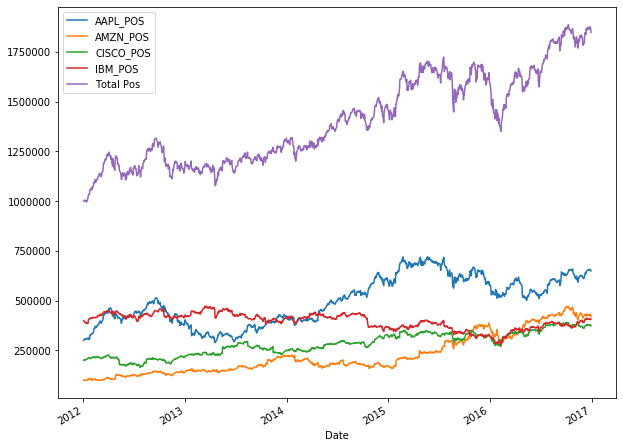

In [25]:
all_pos_val.plot(figsize=(10,8))

In [26]:
0.965812 / (1 - 0.021292)

0.9868234447863918

In [28]:
portfolio_val = all_pos_val
portfolio_val["Daily Return"] = portfolio_val["Total Pos"].pct_change(1)
portfolio_val.head()

,AAPL_POS,AMZN_POS,CISCO_POS,IBM_POS,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,99150.980283,203864.734300,398368.223296,1.002996e+06,0.002996
2012-01-05,304960.727573,99206.836843,203113.258186,396478.797638,1.003760e+06,0.000761
2012-01-06,308148.724558,101999.664861,202361.782072,391926.999463,1.004437e+06,0.000675
2012-01-09,307659.946988,99737.474166,203650.026838,389887.278583,1.000935e+06,-0.003487


In [29]:
portfolio_val["Daily Return"].mean()

0.0005442330716215299

In [30]:
portfolio_val["Daily Return"].std()

0.010568287769162552

In [32]:
SR = portfolio_val["Daily Return"].mean() / portfolio_val["Daily Return"].std()
SR

0.05149680662647737

In [34]:
ASR = (252 ** 0.5) * SR
ASR

0.8174864618858532